In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.activations import sigmoid, linear, relu
from tensorflow.math import add, subtract

tf.__version__

2022-03-12 13:08:24.161184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-12 13:08:24.161212: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.8.0'

## Differential equation
$$\frac{d\psi}{dx} + \left(x+\frac{1+3x^2}{1+x+x^3} \right)\psi = x^3+2x+x^2\left(\frac{1+3x^2}{1+x+x^3} \right)$$ 
Dataset are vectors of domain of differential equation, like the vectors are one-dimentional, the shape of dataset is one by m samples

In [2]:
def analytic_sol(x):
    psi = tf.pow(x,2) + tf.exp(-0.5*tf.pow(x,2))/(1+x+tf.pow(x,3))
    return psi

In [3]:
n_h = 10
X_train = tf.constant(np.linspace(0,5,100), dtype=tf.float32)
X_train = tf.reshape(X_train, (1, tf.shape(X_train)[0]))
Y_train = analytic_sol(X_train)
print("Train data x:\n",X_train)
print("Train data y:\n",Y_train)
print(type(X_train))
print(type(Y_train))
shapes = [tf.shape(X_train)[0],n_h,tf.shape(X_train)[0]]

Train data x:
 tf.Tensor(
[[0.         0.05050505 0.1010101  0.15151516 0.2020202  0.25252524
  0.3030303  0.35353535 0.4040404  0.45454547 0.5050505  0.5555556
  0.6060606  0.65656567 0.7070707  0.75757575 0.8080808  0.85858583
  0.90909094 0.959596   1.010101   1.060606   1.1111112  1.1616162
  1.2121212  1.2626263  1.3131313  1.3636364  1.4141414  1.4646465
  1.5151515  1.5656565  1.6161616  1.6666666  1.7171717  1.7676767
  1.8181819  1.8686869  1.919192   1.969697   2.020202   2.070707
  2.121212   2.1717172  2.2222223  2.2727273  2.3232324  2.3737373
  2.4242425  2.4747474  2.5252526  2.5757575  2.6262627  2.6767676
  2.7272727  2.7777777  2.8282828  2.878788   2.929293   2.979798
  3.030303   3.0808082  3.131313   3.1818182  3.2323232  3.2828283
  3.3333333  3.3838384  3.4343433  3.4848485  3.5353534  3.5858586
  3.6363637  3.6868687  3.7373738  3.7878788  3.838384   3.8888888
  3.939394   3.989899   4.040404   4.090909   4.141414   4.1919193
  4.242424   4.292929   4.3434343  4

2022-03-12 13:08:26.366418: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-12 13:08:26.366446: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-12 13:08:26.366468: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (littlerocket): /proc/driver/nvidia/version does not exist
2022-03-12 13:08:26.366758: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Implementation Neural Network model

Neural Network with one hidden layer with 10 hidden units and sigmoid activation, and one linear output unit.

### Initialize random parameters and compute forward propagation

In [4]:
def initialize_parameters(shapes):
    '''
        Initialize parameters for Neural Network
        
        Input: 
        shape -- list of sizes for parameters
        
        Return:
        parameters --  dictionary of tensors W1,b1,W2,b2,..... 
    '''
    n_x, n_h, n_y = shapes
    
    initializer = tf.keras.initializers.GlorotNormal(seed=1)
    
    W1 = tf.Variable(initializer(shape=(n_h,n_x)))
    b1 = tf.Variable(initializer(shape=(n_h,1)))
    W2 = tf.Variable(initializer(shape=(n_y,n_h)))
    b2 = tf.Variable(initializer(shape=(n_y,1)))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [5]:
def forward_propagation(X, parameters):
    '''
        Forward propagation for model LINEAR -> SIGMOID -> LINEAR -> LINEAR
        
        Inputs:
        X -- input dataset with discrete points of domain of differential equation
        
        Return:
        N -- single output feedforward neural network
    '''
    
    cache = []
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = add(tf.linalg.matmul(W1,X),b1)
    A1 = sigmoid(Z1)
    #Z2 = add(tf.linalg.matmul(W2,A1),b2) # its posible compute with bias term b2
    Z2 = tf.linalg.matmul(W2,A1)
    A2 = linear(Z2)
    
    cache.append(A1)
    
    return A2, cache

#### Test latest function

In [6]:
parameters = initialize_parameters([1,5,1])
print(parameters["W1"].shape)
print(parameters["b1"].shape)
print(parameters["W2"].shape)
print(parameters["b2"].shape)

(5, 1)
(5, 1)
(1, 5)
(1, 1)


In [7]:
X_test = tf.Variable(np.arange(5), dtype=tf.float32)
X_test = tf.reshape(X_test, (1,5))
N, cache = forward_propagation(X_test, parameters)
N

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[ 0.00942882, -0.21110968, -0.37214005, -0.4682066 , -0.5210639 ]],
      dtype=float32)>

### Cost function

In [8]:
def compute_cost(X, N, cache, parameters):
    '''
        Compute the cost function of differential equation
        
        Inputs:
        N -- output of forward propagation
        
        Return:
        cost -- tensor of the cost function
    '''
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1 = cache[0]
    
    dpsi_dx = N + tf.multiply(X, tf.linalg.matmul(tf.linalg.matmul(tf.transpose(1-A1), W1), tf.linalg.matmul(W2, A1)))
    coeff_1 = tf.multiply(X + (1+3*tf.square(X))/(1+X+tf.pow(X,3)), 1 + tf.multiply(N,X))
    coeff_2 = tf.pow(X,3) + 2*X + tf.multiply(tf.square(X), (1+3*tf.square(X))/(1+X+tf.pow(X,3)))
    
    cost = tf.reduce_sum(tf.square(dpsi_dx + coeff_1 - coeff_2))
    
    return cost

#### Test cost function

In [9]:
cost = compute_cost(X_test, N, cache, parameters)
cost

<tf.Tensor: shape=(), dtype=float32, numpy=50236.21>

## Neural Network model

In [10]:
def model(X_train, shape, learning_rate=0.001, num_epochs = 1000, print_cost = False):
    '''
        Model definition of newral network for LINEAR -> SIGMOID -> LINEAR -> LINEAR
        
        Inputs:
        X_train -- input dataset of points of domain
        Y_train -- input dataset of points of analytic solution
        X_test -- input dataset to test different points over domain
        Y_test -- input dataset to test different points of analytic solution
        num_epochs -- number of iterations to optimize
        print_cost -- boolean variable to get cost
        
        Return:
        parameters -- parameters learned by model 
    '''
    
    costs = []
    
    parameters = initialize_parameters(shape)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    for epoch in range(num_epochs):
        
        with tf.GradientTape() as tape:
            N, cache = forward_propagation(X_train, parameters)
            cost = compute_cost(X_train, N, cache, parameters)
        
        trainable_variables = [W1, b1, W2]
        grads = tape.gradient(cost, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
        
    
        if print_cost == True and epoch % 1000 == 0:
            print ("Cost after epoch %i: %f" % (epoch, cost))
            costs.append(cost)
            

    return parameters, costs, cache

In [17]:
parameters, costs, cache = model(X_train, shape=shapes, learning_rate=0.005, num_epochs=20001, print_cost=True)

Cost after epoch 0: 35234432.000000
Cost after epoch 1000: 141803.031250
Cost after epoch 2000: 52963.585938
Cost after epoch 3000: 28430.062500
Cost after epoch 4000: 17170.562500
Cost after epoch 5000: 11044.811523
Cost after epoch 6000: 7518.001465
Cost after epoch 7000: 5440.861816
Cost after epoch 8000: 4133.263672
Cost after epoch 9000: 3233.457520
Cost after epoch 10000: 2592.905762
Cost after epoch 11000: 2138.980469
Cost after epoch 12000: 1835.560547
Cost after epoch 13000: 1605.911377
Cost after epoch 14000: 1463.755981
Cost after epoch 15000: 1356.160645
Cost after epoch 16000: 1222.378784
Cost after epoch 17000: 1124.525635
Cost after epoch 18000: 1106.904541
Cost after epoch 19000: 1021.097595
Cost after epoch 20000: 917.453857


In [18]:
parameters

{'W1': <tf.Variable 'Variable:0' shape=(10, 1) dtype=float32, numpy=
 array([[ 0.09159368],
        [ 0.03789729],
        [ 0.08732653],
        [ 0.17491966],
        [ 0.05879046],
        [-0.21271256],
        [ 0.08284672],
        [ 0.1273314 ],
        [ 1.8380365 ],
        [ 0.0271    ]], dtype=float32)>,
 'b1': <tf.Variable 'Variable:0' shape=(10, 1) dtype=float32, numpy=
 array([[ -2.9723716 ],
        [ -0.15819046],
        [ -0.3685412 ],
        [ -4.0700226 ],
        [ -1.0887393 ],
        [  1.0367167 ],
        [  0.15989235],
        [ -0.47388047],
        [-13.705144  ],
        [ -0.09383076]], dtype=float32)>,
 'W2': <tf.Variable 'Variable:0' shape=(1, 10) dtype=float32, numpy=
 array([[ 1.3140559 ,  1.1992515 ,  3.1287355 ,  1.7680019 ,  1.7228943 ,
         -9.022929  ,  3.17739   ,  4.87044   ,  4.0744677 ,  0.78771126]],
       dtype=float32)>,
 'b2': <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.50065994]], dtype=float32)>}

tf.Tensor(
[[ 1.          0.984501    0.97256666  0.9642141   0.95945996  0.9583212
   0.9608146   0.9669564   0.97676384  0.9902522   1.0074384   1.0283382
   1.0529677   1.0813422   1.113478    1.1493903   1.1890937   1.2326045
   1.2799374   1.331107    1.3861265   1.4450138   1.5077796   1.57444
   1.6450083   1.7194991   1.7979262   1.8803014   1.9666386   2.0569506
   2.1512508   2.2495508   2.3518639   2.4582033   2.5685773   2.683002
   2.8014863   2.9240432   3.0506823   3.181415    3.3162522   3.4552052
   3.5982826   3.7454956   3.896857    4.05237     4.2120495   4.375904
   4.5439425   4.7161703   4.8926044   5.073245    5.258107    5.4471974
   5.640522    5.838091    6.0399137   6.245999    6.456351    6.6709843
   6.8899035   7.1131163   7.3406324   7.572465    7.8086133   8.049096
   8.293922    8.543096    8.796633    9.0545435   9.316839    9.583535
   9.854643   10.1301775  10.410156   10.694595   10.983519   11.276938
  11.574888   11.877382   12.184449   12.496134

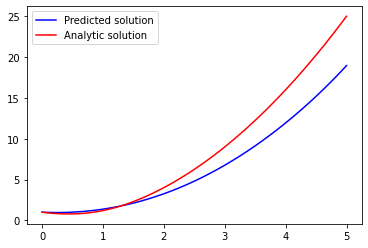

In [22]:
sol = 1 + tf.multiply(X_train, forward_propagation(X_train, parameters)[0])
print(sol)
plt.plot(X_train.numpy()[0], sol.numpy()[0], "-b", label="Predicted solution")
plt.plot(X_train.numpy()[0], Y_train.numpy()[0], "-r", label="Analytic solution")
plt.legend()
plt.show()

In [20]:
error = tf.abs(Y_train - sol)
error

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.        , 0.03135699, 0.05957341, 0.08533269, 0.10907251,
        0.13103598, 0.15131086, 0.16986233, 0.18656385, 0.20122248,
        0.21360695, 0.22346842, 0.23056132, 0.23465848, 0.2355653 ,
        0.23312593, 0.22722816, 0.21780694, 0.20483923, 0.18834257,
        0.16836727, 0.14499831, 0.11833644, 0.08850551, 0.05563855,
        0.01987708, 0.0186348 , 0.05975497, 0.10334182, 0.1492598 ,
        0.19737768, 0.24757457, 0.2997346 , 0.3537495 , 0.40952444,
        0.46696448, 0.5259893 , 0.58651996, 0.6484897 , 0.7118354 ,
        0.7764993 , 0.84243035, 0.9095814 , 0.97791123, 1.0473783 ,
        1.1179538 , 1.1896019 , 1.2622929 , 1.3360052 , 1.4107156 ,
        1.4863973 , 1.563036  , 1.6406107 , 1.7191038 , 1.7985048 ,
        1.8787951 , 1.9599628 , 2.0419936 , 2.1248775 , 2.2086    ,
        2.2931514 , 2.3785229 , 2.4647026 , 2.5516758 , 2.639442  ,
        2.7279816 , 2.8172817 , 2.907342  , 2.9981422 , 3.089675  

In [21]:
from sklearn.metrics import r2_score

r2_score(np.squeeze(Y_train.numpy()), np.squeeze(sol.numpy()))

0.8575937986904649

In [16]:
import tensorflow_probability as tfp 

minimum = np.array([1.0, 1.0])  # The center of the quadratic bowl.
scales = np.array([2.0, 3.0])  # The scales along the two axes.

# The objective function and the gradient.
def quadratic_loss_and_gradient(x):
    return tfp.math.value_and_gradient(
        lambda x: tf.reduce_sum(
            scales * tf.math.squared_difference(x, minimum), axis=-1),
        x)

start = tf.constant([0.6, 0.8])  # Starting point for the search.
optim_results = tfp.optimizer.bfgs_minimize(
    quadratic_loss_and_gradient, initial_position=start, tolerance=1e-8)

# Check that the search converged
assert(optim_results.converged)Z2 = add(tf.linalg.matmul(W2,A1),b2)
# Check that the argmin is close to the actual value.
np.testing.assert_allclose(optim_results.position, minimum)
# Print out the total number of function evaluations it took. Should be 5.
print ("Function evaluations: %d" % optim_results.num_objective_evaluations)

print(optim_results.position)

Function evaluations: 5
tf.Tensor([1. 1.], shape=(2,), dtype=float32)
